In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

We compiled the US States (and Washington DC) tax rates into one dataset from 2000-2023 based on the available information from the US Government. Then we added added it as a pandas DataFrame and rounded the numbers. 

In [294]:
df = pd.read_csv("taxrates.csv")
df = df.rename(columns={"State":"NAME", "STUSPS": "STATE"}).round(2)
df.head()

,NAME,STATE,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alabama,AL,5.00,5.00,6.00,5.00,6.50,6.50,6.50,6.50,...,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50
1,Alaska,AK,5.20,5.20,5.44,5.44,5.44,5.44,5.44,5.44,...,5.44,5.34,5.34,5.34,5.34,5.34,5.34,5.34,5.34,5.34
2,Arizona,AZ,8.00,7.97,6.97,6.97,6.97,6.97,6.97,6.97,...,6.50,5.50,5.50,4.90,4.90,4.90,4.90,4.90,4.90,4.90
3,Arkansas,AR,3.75,3.75,3.92,3.92,3.92,3.92,3.92,3.92,...,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.87,3.65,3.55
4,California,CA,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,...,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84


Let us create another dataframe that calculates the changes in the tax rate from 2005-2023

In [295]:
df_change = df[["NAME", "STATE"]]
df_change.head()
df_change["change"] = df["2023"] - df["2005"]
df_change.head()

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_34459/422282849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change["change"] = df["2023"] - df["2005"]


,NAME,STATE,change
0,Alabama,AL,0.00
1,Alaska,AK,-0.10
2,Arizona,AZ,-2.07
3,Arkansas,AR,-0.37
4,California,CA,0.00


To get an idea of the changes in the tax rates of each state, we transpose the data and plot a line graph using matplotlib.

In [296]:
df_t = df.T 
df_t.columns=df_t.iloc[0]
df_t = df_t.tail(-2)
df_t.head()


NAME,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,District of Columbia
2000,5.0,5.2,8.0,3.75,8.84,4.75,8.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.38,6.0,0.0,9.0,7.9,0.0,9.98
2001,5.0,5.2,7.97,3.75,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.38,6.0,0.0,9.0,7.9,0.0,9.98
2002,6.0,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.5
2003,5.0,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.5
2004,6.5,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.5,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.98


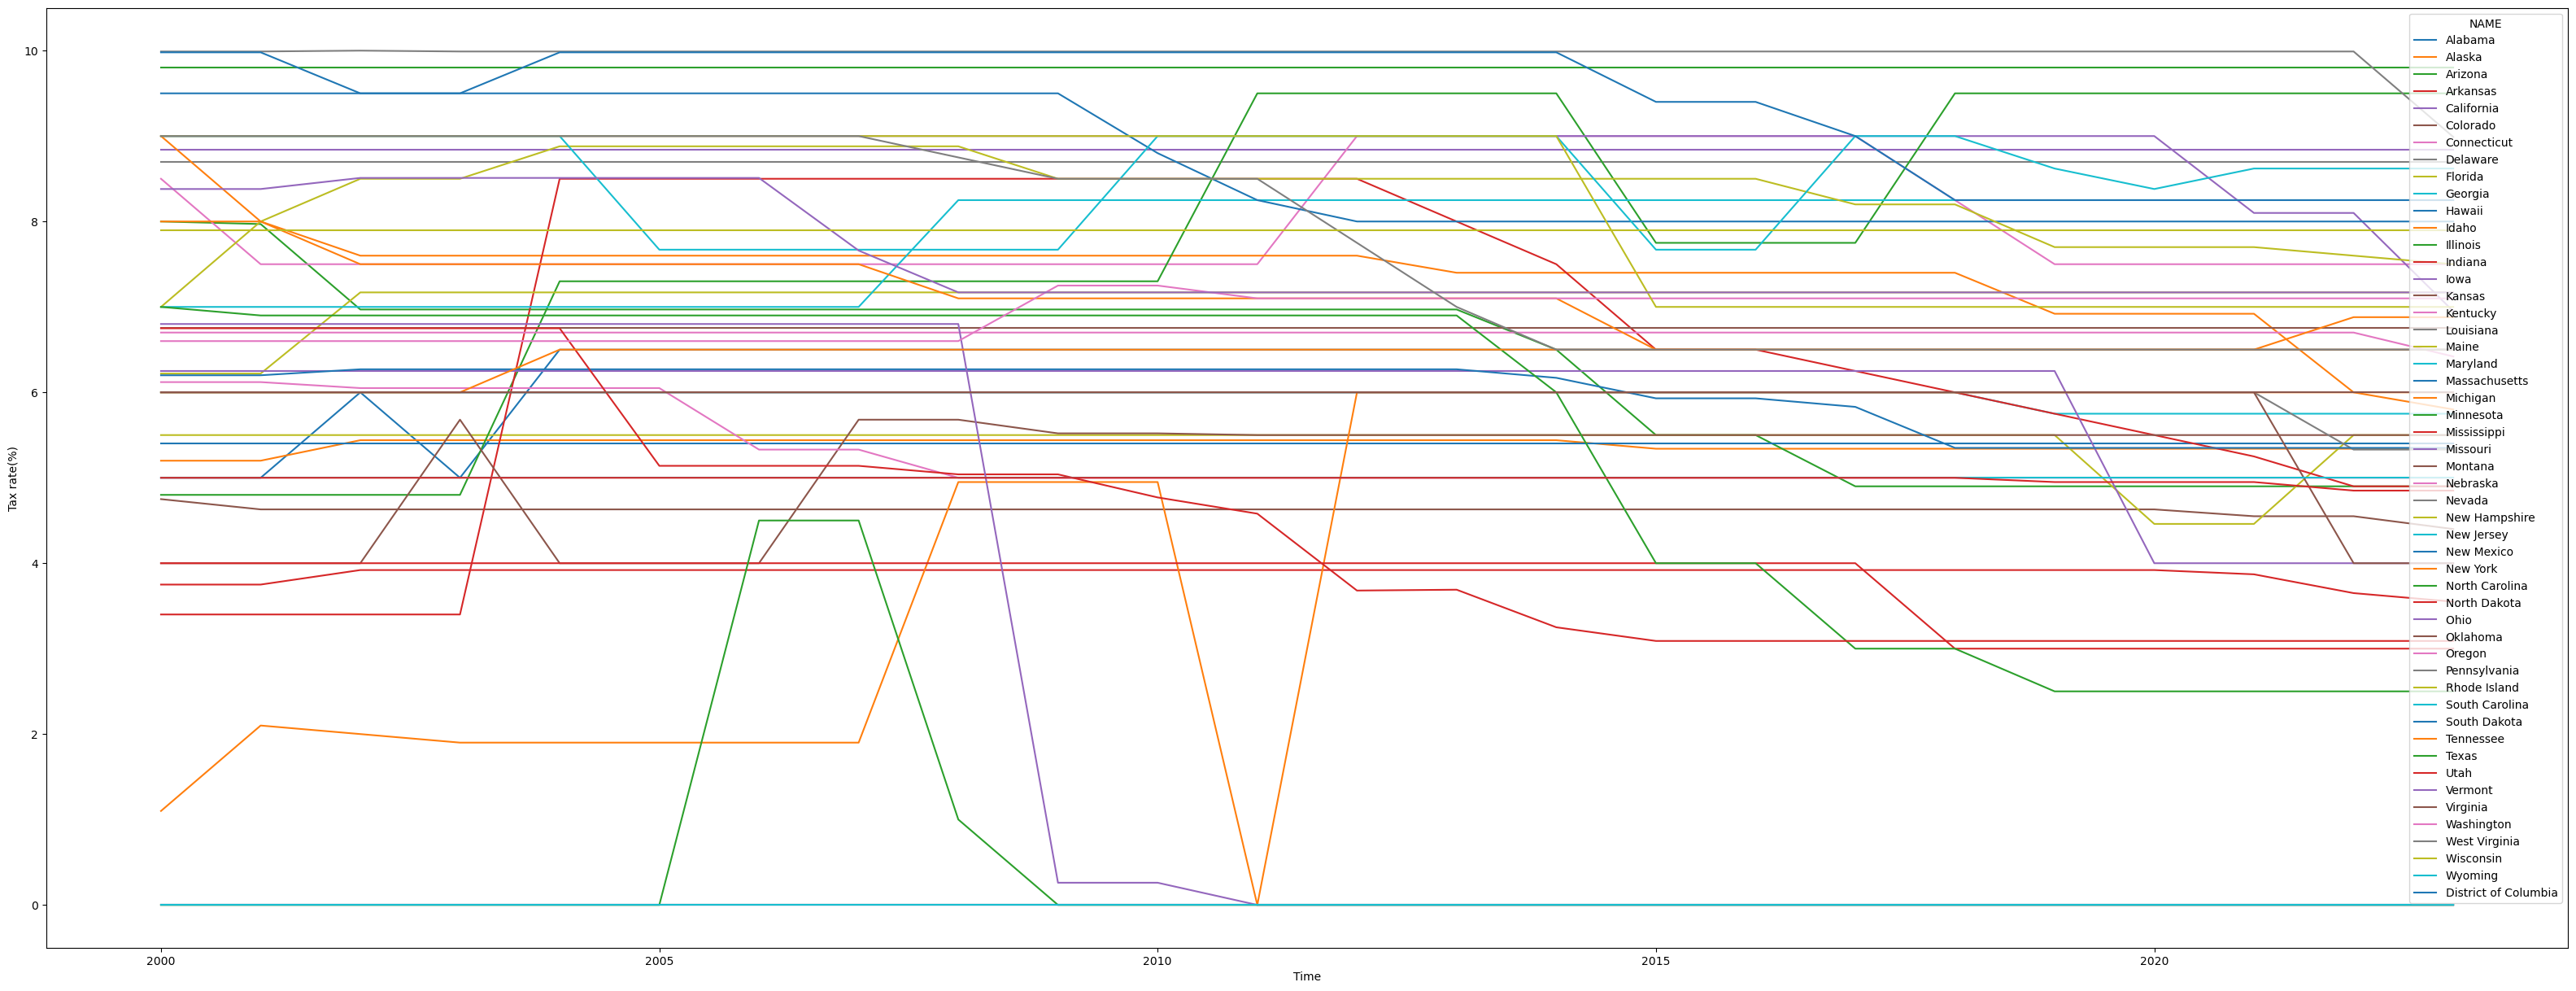

In [297]:
# plot the data
ax = df_t.plot(figsize=(40,15))

# set x-axis label and values
ax.set_xlabel("Time")
ax.set_ylabel("Tax rate(%)")

plt.show()

In [303]:
shapefile = 's_08mr23/s_08mr23.shp'
gdf = gpd.read_file(shapefile)
gdf

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
5,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
6,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
7,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
8,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
9,FL,Florida,12,-82.509340,28.674020,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ..."


In [304]:
#drop Puerto rico, Fed States of Micronesia, American Samoa, US Virgin Islands, Guam, Commonwealth of the northern mariana islands from file
gdf = gdf.drop(index=[2,37,44,52,54,55,56,57])
gdf = gdf.reset_index(drop=True)

In [300]:
len(gdf)

51

Creating the merged dataset that will include the Tax rate as a column

In [265]:
df_test = df_change[['STATE','change']].copy()
df_test.head()

,STATE,change
0,AL,0.00
1,AK,-0.10
2,AZ,-2.07
3,AR,-0.37
4,CA,0.00


<Axes: >

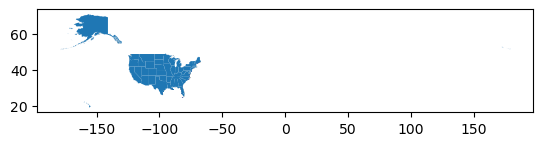

In [305]:
gdf.plot()

We are going to clip Hawaii and Alaska and add them separately. 

<Axes: >

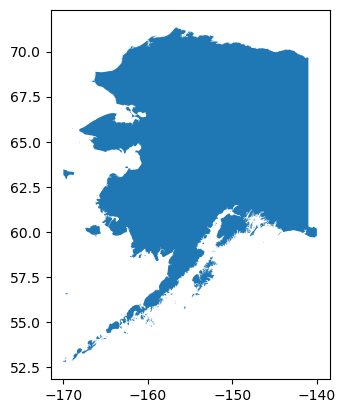

In [267]:
alaska_gdf = gdf[gdf.STATE=='AK']
alaska_gdf = alaska_gdf.merge(df_test, on="STATE")
#clipping some of the western islands to make it fit better
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = alaska_gdf.clip(polygon)
alaska_gdf
alaska_gdf.plot()

<Axes: >

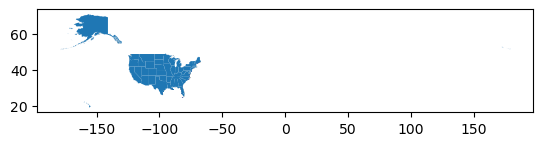

In [307]:
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,40)])
gdf_tester = gdf.clip(polygon)
gdf.plot()

In [290]:
hawaii_gdf = gdf[gdf.STATE=='HI']
hawaii_gdf = hawaii_gdf.merge(df_test, on="STATE")
hawaii_gdf

,STATE,NAME,FIPS,LON,LAT,geometry,change
0,HI,Hawaii,15,-156.34743,20.24923,"MULTIPOLYGON (((-155.91183 19.18402, -155.9120...",0.0


Removing Alaska and Hawaii from the table due to mapping errors. Will add back later separately.

In [275]:
gdf_test = gdf.drop(gdf[gdf['STATE'] == 'AK'].index)
gdf_test = gdf_test.drop(gdf_test[gdf_test['STATE'] == 'HI'].index)
len(gdf_test)

49

In [270]:
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar

In [276]:
gdf_new = gdf_test.merge(df_test, on="STATE")
gdf_new

,STATE,NAME,FIPS,LON,LAT,geometry,change
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",0.00
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",-0.37
2,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",-2.07
3,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",0.00
4,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",-0.23
5,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",0.00
6,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",-1.73
7,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",0.00
8,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...",0.00
9,GA,Georgia,13,-83.44848,32.65155,"MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ...",-0.25


Plotting the values on a geographical map we get a heatmap:

<Axes: >

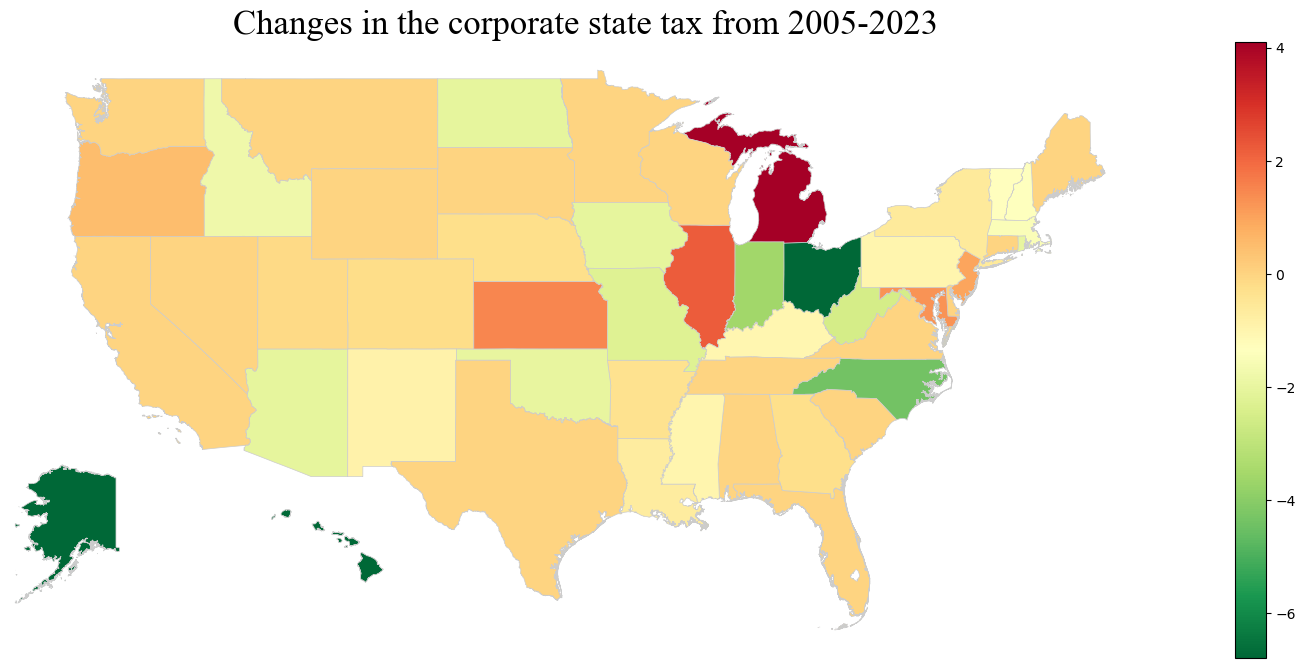

In [292]:
# Print the map
# Set the range for the choropleth
title = 'Changes in the corporate state tax from 2005-2023'
col = 'change'
vmin = gdf_new[col].min()
vmax = gdf_new[col].max()
cmap = 'RdYlGn_r'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
gdf_new.plot(column=col, ax=ax, edgecolor='0.8', linewidth=0.5, cmap=cmap, legend=True)
# Add a title
ax.set_title(title, fontdict={'fontname': 'Times New Roman','fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

#Add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
alaska_gdf.plot(column=alaska_gdf["change"], cmap="RdYlGn_r", ax=akax, linewidth=0.5, edgecolor='0.8')

#Add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])      
hiax.axis('off')
hawaii_gdf.plot(column=hawaii_gdf["change"], cmap="RdYlGn_r", ax=hiax, linewidth=0.5, edgecolor='0.8')



In [279]:
df_change

,NAME,STATE,change
0,Alabama,AL,0.00
1,Alaska,AK,-0.10
2,Arizona,AZ,-2.07
3,Arkansas,AR,-0.37
4,California,CA,0.00
5,Colorado,CO,-0.23
6,Connecticut,CT,0.00
7,Delaware,DE,0.00
8,Florida,FL,0.00
9,Georgia,GA,-0.25
